In [1]:
%matplotlib inline
from cf import CF
import matplotlib.pyplot as plt
import numpy as np
import pickle, math

items = [
    'a', 'ag', 'al', 'au', 'b', 'bb', 'bu', 'c', 'cf', 'cu', 'fb', 'fg', 'fu', 'i', 
    'if', 'j', 'jd', 'jm', 'jr', 'l', 'm', 'me', 'oi', 'p', 'pb', 'pm', 'rb', 'ri', 
    'rm', 'rs', 'ru', 'sr', 'ta', 'tc', 'tf', 'v', 'wh', 'wr', 'y', 'zn', 'fund'
]

item2name = {
    'a': '豆一', 'ag': '沪银', 'al': '沪铝', 'au': '沪金', 'b': '豆二', 'bb': '胶合板', 'bu': '沥青', 'c': '玉米', 
    'cf': '郑棉', 'cu': '沪铜', 'fb': '纤维板', 'fg': '玻璃', 'fu': '燃油', 'i': '铁矿石', 'j': '焦炭', 'jd': '鸡蛋', 
    'jm': '焦煤', 'jr': '粳稻', 'l': '塑料', 'lr': '晚籼稻', 'm': '豆粕', 'me': '甲醇', 'ni': '沪镍', 'oi': '菜油', 
    'p': '棕榈油', 'pb': '沪铅', 'pm': '普麦', 'rb': '螺纹钢', 'ri': '早籼稻', 'rm': '菜粕', 'rs': '菜籽', 'ru': '橡胶', 
    'sr': '白糖', 'ta': 'PTA', 'tc': '动力煤', 'v': 'PVC', 'wh': '强麦', 'wr': '线材', 'y': '豆油', 'zn': '沪锌', 'fund': 'fund'
}

cf = CF('../merge/whole_month.data', preprocess=['log10'])

/home/lizimeng/python/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


In [4]:
res = cf.tucker([10,10,6], [2,2,4,2])
print (res.RRMSE)
print (res.sparseness)
err = (res.R-res.R_hat) / (res.R + np.ones(res.R.shape)/10**3)
err_sorted = err.reshape((-1,))
err_sorted.sort()

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-769d49a8-768d-4fa2-bb2e-6abcd1144213
Send 'exit' command to kill the server
...MATLAB started and connected!
MATLAB closed
0.310766592149
(0.54560340260130025, 0.53860250326548675, 0.43540643912394683, 0.49457314002027064)


# 误差的分布

## 柱状图

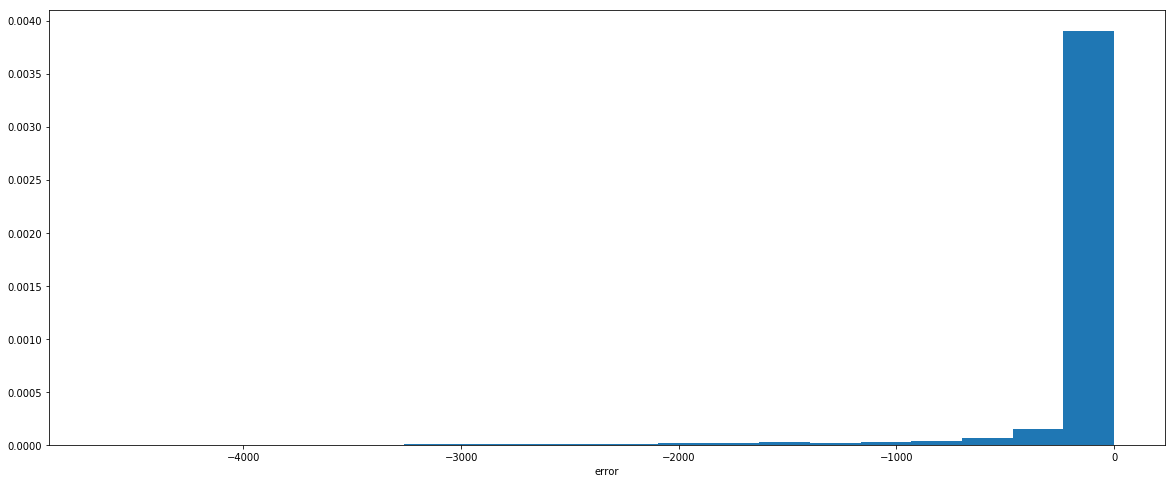

In [5]:
plt.figure(figsize=(20,8))
plt.hist(err_sorted, bins=20, normed=True)
plt.xlabel('error')
plt.show()

## 累计分布函数

In [ ]:
X = []
Y = []
for i in range(0,len(err_sorted),80):
    x = err_sorted[i]
    X.append(x)
    Y.append(i / len(err_sorted))
plt.figure(figsize=(20,8))
plt.plot(X,Y)
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(X[-450:-60],Y[-450:-60])
plt.grid()
plt.xlabel('error')
plt.show()

## 柱状图（$error \in [-5, +\infty)$）

In [ ]:
tmp = []
for e in _err:
    if e>=-5:
        tmp.append(e)
plt.figure(figsize=(20,8))
plt.hist(tmp, bins=20, normed=True)
plt.show()

# 误差从小到大排序

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(err_sorted)
plt.ylabel('error')
plt.show()

# 误差从小到大排序（只看最小的6000个）

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(err_sorted[:6000])
plt.show()

# 误差最大（绝对值）的500个，是那些？

In [ ]:
tmp = np.abs(err_sorted)
tmp.sort()
threshold = tmp[-500]
tmp = []
M,N = 41,36
for i in range(M):
    for j in range(M):
        for k in range(N):
            if abs(err[i,j,k])>= threshold:
                tmp.append([i,j,k])
print (tmp)

# 压缩时间维度，看误差在品种间的分布

In [ ]:
tmp = np.mean(np.abs(err), axis=2)
#tmp = (tmp - np.min(tmp)) / (np.max(tmp)-np.min(tmp))
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(tmp, cmap='gray')
plt.show()

In [ ]:
np.log10(np.array(range(1,10)))